<a href="https://colab.research.google.com/github/bhupi83/creative-chem/blob/main/Ketene_kinetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ipywidgets
from google.colab import output
output.enable_custom_widget_manager()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.1 MB/s eta 0:00:00


In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider
import ipywidgets as widgets

# Reaction function
def first_order_reaction(k, C_A0, t_max):
    def rate(t, C_A):
        return -k * C_A

    t_span = (0, t_max)
    t_eval = np.linspace(*t_span, 100)
    sol = solve_ivp(rate, t_span, [C_A0], t_eval=t_eval)

    plt.figure(figsize=(7, 4))
    plt.plot(sol.t, sol.y[0], label='[A](t)', color='blue')
    plt.xlabel('Time (s)')
    plt.ylabel('Concentration (mol/L)')
    plt.title('First-Order Reaction: A → B')
    plt.grid(True)
    plt.legend()
    plt.show()

# Create interactive sliders
interact(
    first_order_reaction,
    k=FloatSlider(value=0.5, min=0.01, max=2.0, step=0.05, description='k (1/s)'),
    C_A0=FloatSlider(value=1.0, min=0.1, max=2.0, step=0.1, description='[A]₀ (mol/L)'),
    t_max=IntSlider(value=10, min=5, max=50, step=1, description='Time max (s)')
);

interactive(children=(FloatSlider(value=0.5, description='k (1/s)', max=2.0, min=0.01, step=0.05), FloatSlider…

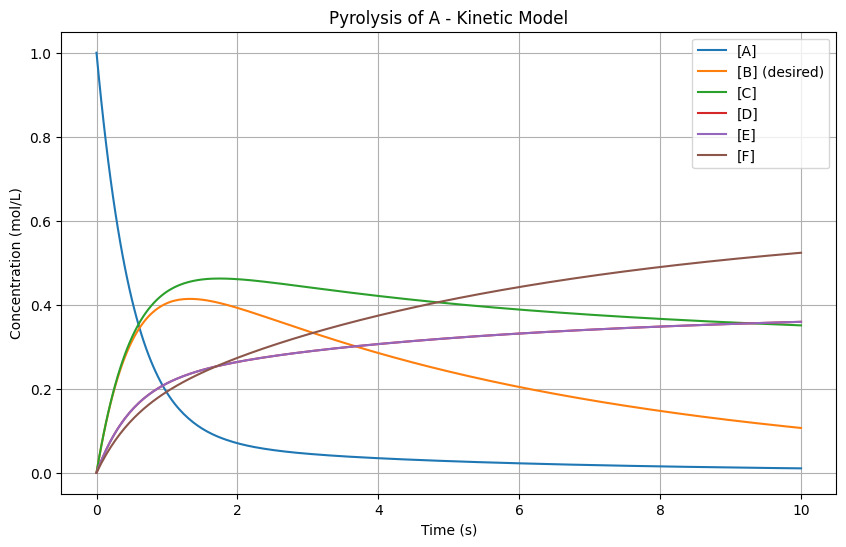

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Define the ODE system
def pyrolysis_model(t, y, k1, k2, k3, kBF, kBCA):
    A, B, C, D, E, F = y
    dA_dt = -k1*A - k2*A - k3*A + kBCA*B*C
    dB_dt = k1*A - kBF*B - kBCA*B*C
    dC_dt = k1*A - kBCA*B*C
    dD_dt = k2*A
    dE_dt = k2*A
    dF_dt = k3*A + kBF*B
    return [dA_dt, dB_dt, dC_dt, dD_dt, dE_dt, dF_dt]

# Interactive plot function
def interactive_plot(k1, k2, k3, kBF, kBCA):
    # Initial concentrations
    y0 = [1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    t_eval = np.linspace(0, 10, 300)

    sol = solve_ivp(pyrolysis_model, (0, 10), y0, args=(k1, k2, k3, kBF, kBCA), t_eval=t_eval)

    plt.figure(figsize=(10, 6))
    labels = ['[A]', '[B] (desired)', '[C]', '[D]', '[E]', '[F]']
    for i in range(6):
        plt.plot(sol.t, sol.y[i], label=labels[i])
    plt.xlabel('Time (s)')
    plt.ylabel('Concentration (mol/L)')
    plt.title('Pyrolysis of A - Kinetic Model')
    plt.grid(True)
    plt.legend()
    plt.show()

# Create interactive GUI
interact(
    interactive_plot,
    k1=FloatSlider(value=0.5, min=0, max=2, step=0.05, description='k1 (A→B+C)'),
    k2=FloatSlider(value=0.2, min=0, max=2, step=0.05, description='k2 (A→D+E)'),
    k3=FloatSlider(value=0.1, min=0, max=2, step=0.05, description='k3 (A→F)'),
    kBF=FloatSlider(value=0.1, min=0, max=2, step=0.05, description='kBF (B→F)'),
    kBCA=FloatSlider(value=0.1, min=0, max=2, step=0.05, description='kBCA (B+C→A)')
);


In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Define the ODE system
def pyrolysis_model(t, y, k1, k2, k3, kBF, kBCA):
    A, B, C, D, E, F = y
    dA_dt = -k1*A - k2*A - k3*A + kBCA*B*C
    dB_dt = k1*A - kBF*B - kBCA*B*C
    dC_dt = k1*A - kBCA*B*C
    dD_dt = k2*A
    dE_dt = k2*A
    dF_dt = k3*A + kBF*B
    return [dA_dt, dB_dt, dC_dt, dD_dt, dE_dt, dF_dt]

# Interactive plot function
def interactive_plot(k1, k2, k3, kBF, kBCA):
    # Initial concentrations
    y0 = [1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    t_eval = np.linspace(0, 10, 300)

    sol = solve_ivp(pyrolysis_model, (0, 10), y0, args=(k1, k2, k3, kBF, kBCA), t_eval=t_eval)

    plt.figure(figsize=(10, 6))
    labels = ['[A]', '[B] (desired)', '[C]', '[D]', '[E]', '[F]']
    for i in range(6):
        plt.plot(sol.t, sol.y[i], label=labels[i])
    plt.xlabel('Time (s)')
    plt.ylabel('Concentration (mol/L)')
    plt.title('Pyrolysis of A - Kinetic Model')
    plt.grid(True)
    plt.legend()
    plt.show()

# Create interactive GUI
interact(
    interactive_plot,
    k1=FloatSlider(value=0.5, min=0, max=2, step=0.05, description='k1 (A→B+C)'),
    k2=FloatSlider(value=0.2, min=0, max=2, step=0.05, description='k2 (A→D+E)'),
    k3=FloatSlider(value=0.1, min=0, max=2, step=0.05, description='k3 (A→F)'),
    kBF=FloatSlider(value=0.1, min=0, max=2, step=0.05, description='kBF (B→F)'),
    kBCA=FloatSlider(value=0.1, min=0, max=2, step=0.05, description='kBCA (B+C→A)')
);

interactive(children=(FloatSlider(value=0.5, description='k1 (A→B+C)', max=2.0, step=0.05), FloatSlider(value=…